In [17]:
#Import librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from scipy.stats import pearsonr
import scipy.stats as stats
from plotly.subplots import make_subplots
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew, shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, f1_score, mean_squared_error,
    ConfusionMatrixDisplay
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import optuna
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
import lime
from lime.lime_tabular import LimeTabularExplainer
import lightgbm as lgb



In [18]:
#Import data
train_df = pd.read_csv('C:/Users/Mega-Pc/Freelance/data/train_df_cleaned_new.csv', delimiter=',', encoding='utf-8',index_col=0)
test_df = pd.read_csv('C:/Users/Mega-Pc/Freelance/data/test_df_cleaned_new.csv', delimiter=',', encoding='utf-8',index_col=0)



## Data Splitting

In [19]:
X_train = train_df.drop(columns=['is_fraud'])  
y_train = train_df['is_fraud']  

X_test = test_df.drop(columns=['is_fraud'])  
y_test = test_df['is_fraud']  


In [20]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))

## 🎯 Evaluation metrics

In [21]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, 
    precision_recall_curve, auc, f1_score, matthews_corrcoef
)
from imblearn.metrics import geometric_mean_score
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, threshold_plot=False):
    # Predict probabilities
    y_train_proba = model.predict(X_train).flatten()
    y_train_pred = (y_train_proba >= 0.5).astype(int)

    y_test_proba = model.predict(X_test).flatten()
    y_test_pred = (y_test_proba >= 0.5).astype(int)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overall_accuracy = accuracy_score(np.concatenate([y_train, y_test]), 
                                      np.concatenate([y_train_pred, y_test_pred]))

    f1 = f1_score(y_test, y_test_pred)
    g_mean = geometric_mean_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    print(f"\033[1;34mAlgorithm: Neural Network\033[0m")
    print("\n\033[1;32mClassification Report:\033[0m\n", classification_report(y_test, y_test_pred, target_names=["No Churn", "Churn"]))
    print(f"\033[1;36mTraining Accuracy:\033[0m {train_accuracy:.4f}")
    print(f"\033[1;36mTest Accuracy:\033[0m {test_accuracy:.4f}")
    print(f"\033[1;36mOverall Accuracy:\033[0m {overall_accuracy:.4f}")
    print(f"\033[1;35mF1 Score:\033[0m {f1:.4f}")
    print(f"\033[1;35mG-Mean:\033[0m {g_mean:.4f}")
    print(f"\033[1;35mMatthews Correlation Coefficient (MCC):\033[0m {mcc:.4f}")

    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_proba)
    pr_auc_train = auc(recall_train, precision_train)

    precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc_test = auc(recall_test, precision_test)

    recall_combined = np.concatenate([recall_train, recall_test])
    precision_combined = np.concatenate([precision_train, precision_test])
    sorted_indices = np.argsort(recall_combined)
    recall_combined = recall_combined[sorted_indices]
    precision_combined = precision_combined[sorted_indices]

    print(f"\033[1;31mTraining Precision-Recall AUC:\033[0m {pr_auc_train:.4f}")
    print(f"\033[1;31mTest Precision-Recall AUC:\033[0m {pr_auc_test:.4f}")
    print(f"\033[1;31mOverall Precision-Recall AUC:\033[0m {auc(recall_combined, precision_combined):.4f}")

    trace1 = go.Scatter(x=recall_test, y=precision_test, name="Test Precision-Recall Curve",
                        line=dict(color='blue', width=3),
                        hovertemplate='<b>Recall:</b> %{x}<br><b>Precision:</b> %{y}')
    trace2 = go.Scatter(x=recall_train, y=precision_train, name="Train Precision-Recall Curve",
                        line=dict(color='green', width=3),
                        hovertemplate='<b>Recall:</b> %{x}<br><b>Precision:</b> %{y}')
    trace3 = go.Scatter(x=recall_combined, y=precision_combined, name="Overall Precision-Recall Curve",
                        line=dict(color='purple', width=3, dash='dot'),
                        hovertemplate='<b>Recall:</b> %{x}<br><b>Precision:</b> %{y}')
    trace4 = go.Scatter(x=[0, 1], y=[1, 0], name="Random Chance",
                        line=dict(color='red', dash='dash', width=2))

    
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    heatmap = go.Heatmap(
        z=conf_matrix,
        x=["No Churn", "Churn"],
        y=["No Churn", "Churn"],
        colorscale=[
            [0.0, "#FFF7EC"],
            [0.33, "#FDBB84"],
            [0.66, "#FC8D59"],
            [1.0, "#D7301F"]
        ],
        zmin=0,
        zmax=conf_matrix.max(),
        colorbar=dict(title="Count"),
        hovertemplate="True Class: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>",
        showscale=True
    )


    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=(
            'Confusion Matrix',
            'Precision-Recall Curve'
        )
    )

    fig.add_trace(heatmap, row=1, col=1)
    fig.add_trace(trace1, row=1, col=2)
    fig.add_trace(trace2, row=1, col=2)
    fig.add_trace(trace3, row=1, col=2)
    fig.add_trace(trace4, row=1, col=2)

    fig.update_layout(
        showlegend=True,
        title="Model Performance",
        autosize=True,
        height=500, width=1000,
        plot_bgcolor='rgba(240,240,240,0.95)',
        paper_bgcolor='rgba(240,240,240,0.95)',
        font=dict(family="Arial", size=12),
    )

    fig.update_xaxes(title_text="Predicted Labels", row=1, col=1)
    fig.update_yaxes(title_text="Actual Labels", row=1, col=1)
    fig.update_xaxes(title_text="Recall", row=1, col=2)
    fig.update_yaxes(title_text="Precision", row=1, col=2)

    fig.show()


## Deep neural network

In [22]:
train_df

,merchant,amt,first,last,street,city,zip,lat,long,city_pop,...,age_group_senior,amt_category_medium,amt_category_high,trans_date_trans_time_year,trans_date_trans_time_month,trans_date_trans_time_day,trans_date_trans_time_weekday,trans_date_trans_time_hour,dob_weekday,dob_hour
cc_num,,,,,,,,,,,,,,,,,,,,,
60416207185,0.523121,0.605444,0.658824,0.219149,0.994583,0.304245,0.823573,0.663404,0.238664,0.363638,...,False,False,True,0.0,0.0,0.666667,1.000000,0.565217,0.0,0.0
60416207185,0.325145,0.538535,0.658824,0.219149,0.994583,0.304245,0.823573,0.663404,0.238664,0.363638,...,False,False,True,0.0,0.0,0.666667,1.000000,0.695652,0.0,0.0
60416207185,0.148844,0.511837,0.658824,0.219149,0.994583,0.304245,0.823573,0.663404,0.238664,0.363638,...,False,True,False,0.0,0.0,0.700000,0.000000,0.304348,0.0,0.0
60416207185,0.539017,0.554576,0.658824,0.219149,0.994583,0.304245,0.823573,0.663404,0.238664,0.363638,...,False,False,True,0.0,0.0,0.700000,0.000000,0.652174,0.0,0.0
60416207185,0.552023,0.630376,0.658824,0.219149,0.994583,0.304245,0.823573,0.663404,0.238664,0.363638,...,False,False,True,0.0,0.0,0.733333,0.166667,0.521739,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992346398065154184,0.684971,0.513723,0.085294,0.485106,0.927411,0.553066,0.608915,0.600027,0.604544,0.266659,...,True,True,False,0.0,1.0,1.000000,0.500000,0.086957,0.0,0.0
4992346398065154184,0.093931,0.150035,0.085294,0.485106,0.927411,0.553066,0.608915,0.600027,0.604544,0.266659,...,True,False,False,0.0,1.0,1.000000,0.500000,0.217391,0.0,0.0
4992346398065154184,0.234104,0.567530,0.085294,0.485106,0.927411,0.553066,0.608915,0.600027,0.604544,0.266659,...,True,False,True,0.0,1.0,1.000000,0.500000,0.478261,0.0,0.0


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

# --- CLASS WEIGHTS ---
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weights_dict)

# --- MODEL DEFINITION ---
dnn = Sequential([
    

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),


    Dense(1, activation='sigmoid')
])

# --- COMPILE ---
dnn.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# --- TRAIN ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history = dnn.fit(
    X_train, y_train,
    validation_split=0.1,  # small validation from train
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)

# --- TEST EVALUATION ---
predictions = dnn.predict(X_test)
binary_preds = (predictions >= 0.5).astype(int).flatten()

print("\nClassification Report:")
print(classification_report(y_test, binary_preds))


Class Weights: {0: 0.5019374103552551, 1: 129.53822843822843}
Epoch 1/50
15630/15630 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step - accuracy: 0.7936 - auc: 0.9110 - loss: 0.8858 - val_accuracy: 0.8624 - val_auc: 0.9810 - val_loss: 0.6624
Epoch 2/50
15630/15630 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.9231 - auc: 0.9799 - loss: 0.4200 - val_accuracy: 0.9063 - val_auc: 0.9709 - val_loss: 0.4791
Epoch 3/50
15630/15630 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step - accuracy: 0.9345 - auc: 0.9851 - loss: 0.3239 - val_accuracy: 0.9176 - val_auc: 0.9882 - val_loss: 0.3580
Epoch 4/50
15630/15630 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.9308 - auc: 0.9838 - loss: 0.3259 - val_accuracy: 0.9558 - val_auc: 0.9901 - val_loss: 0.2746
Epoch 5/50
15630/15630 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step - accuracy: 0.9343 - auc: 0.9789 - loss: 0.3280 - val_accuracy: 0.9547 - val_auc: 0.9854 - val_loss: 0.2790
Epoch 6/50
15630/15630 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - accuracy: 0.9392 - auc: 0.9858 - loss: 0.2996 - val_ac

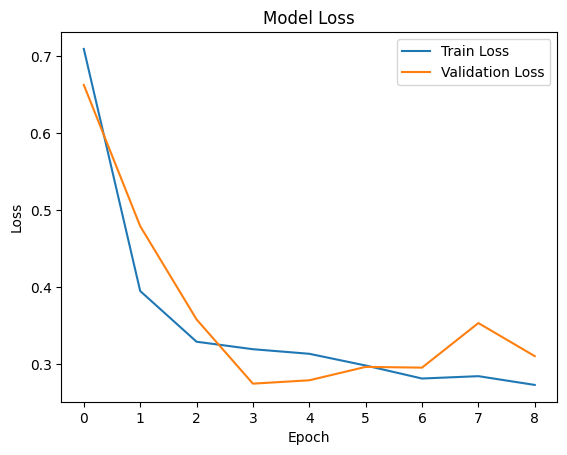

In [24]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
